In [ ]:
import os
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import random


In [ ]:
path = 'brain_tumor_dataset'

pos_dir = 'yes'
neg_dir = 'no'

image_size = (224, 224)

# Load the images into a list
images = []
labels = []
for filename in os.listdir(os.path.join(path, pos_dir)):
    if filename.endswith('.jpg'):
        # Load the image from file
        img = Image.open(os.path.join(path, pos_dir, filename))
        img = img.convert('L')
        # Resize the image
        img = img.resize(image_size)
        img = np.asarray(img) / 255.0
        
        images.append(np.asarray(img))
        labels.append(1)
for filename in os.listdir(os.path.join(path, neg_dir)):
    if filename.endswith('.jpg'):
        # Load the image from file
        img = Image.open(os.path.join(path, neg_dir, filename))
        img = img.convert('L')
        # Resize the image
        img = img.resize(image_size)
        img = np.asarray(img) / 255.0
        
        images.append(np.asarray(img))
        labels.append(0)


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)


X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (136, 224, 224)
y_train shape: (136, 1)
X_test shape: (35, 224, 224)
y_test shape: (35, 1)


In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
num_images = X_test.shape[0]
# Loop through the first 25 images in X_test and display each one in a subplot
for i, ax in enumerate(axes.flat):
    if i < num_images:
        # Display the i-th image in X_test
        ax.imshow(X_test[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        # Hide any unused subplots
        ax.axis('off')

plt.show()

In [ ]:
from matplotlib import image as mp_image

# Set the path to the directory containing the 'yes' and 'no' folders
data_dir = 'drive/MyDrive/brain_tumor_dataset'

# Set the paths to the 'yes' and 'no' folders
yes_dir = os.path.join(data_dir, 'yes')
no_dir = os.path.join(data_dir, 'no')

# Get the filenames of three images from the 'yes' folder and three images from the 'no' folder
yes_filenames = os.listdir(yes_dir)[:3]
no_filenames = os.listdir(no_dir)[:3]

# Loop through the filenames and plot the images with their labels
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for i in range(3):
    # Load the 'yes' image
    yes_img_path = os.path.join(yes_dir, yes_filenames[i])
    yes_img = mp_image.imread(yes_img_path)
    
    # Plot the 'yes' image with its label
    axs[0, i].imshow(yes_img)
    axs[0, i].set_title('Cancerous')
    
    # Load the 'no' image
    no_img_path = os.path.join(no_dir, no_filenames[i])
    no_img = mp_image.imread(no_img_path)
    
    # Plot the 'no' image with its label
    axs[1, i].imshow(no_img)
    axs[1, i].set_title('Not Cancerous')

plt.show()

In [ ]:
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL_AND_VERTICAL
data_augmentation=tf.keras.Sequential([
            tf.keras.layers.RandomFlip(mode=HORIZONTAL_AND_VERTICAL),
            tf.keras.layers.RandomBrightness(factor=1,value_range=[10,20]),
])

In [ ]:

model=tf.keras.models.Sequential([
    
    
    tf.keras.layers.InputLayer(input_shape=(224,224,1)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding ="valid",activation='leaky_relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding ="valid",activation='leaky_relu'),
    tf.keras.layers.MaxPooling2D((2,2)), 
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200,activation='leaky_relu'),
    
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 200)              

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_test, y_test))

Epoch 1/15
5/5 [==============================] - 9s 1s/step - loss: 2.2184 - accuracy: 0.5368 - val_loss: 0.8611 - val_accuracy: 0.6857
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 0.6169 - accuracy: 0.7500 - val_loss: 0.4041 - val_accuracy: 0.7714
Epoch 3/15
5/5 [==============================] - 5s 990ms/step - loss: 0.3908 - accuracy: 0.8015 - val_loss: 0.4228 - val_accuracy: 0.8000
Epoch 4/15
5/5 [==============================] - 5s 995ms/step - loss: 0.3170 - accuracy: 0.8676 - val_loss: 0.3330 - val_accuracy: 0.8286
Epoch 5/15
5/5 [==============================] - 5s 1s/step - loss: 0.2747 - accuracy: 0.9265 - val_loss: 0.3371 - val_accuracy: 0.8571
Epoch 6/15
5/5 [==============================] - 5s 980ms/step - loss: 0.2103 - accuracy: 0.9044 - val_loss: 0.2838 - val_accuracy: 0.9429
Epoch 7/15
5/5 [==============================] - 5s 997ms/step - loss: 0.1343 - accuracy: 0.9412 - val_loss: 0.2704 - val_accuracy: 0.9429
Epoch 8/15
5/5 [=============

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

2/2 [==============================] - 0s 58ms/step - loss: 0.2606 - accuracy: 0.9429
Test loss: 0.2606165111064911
Test accuracy: 0.9428571462631226


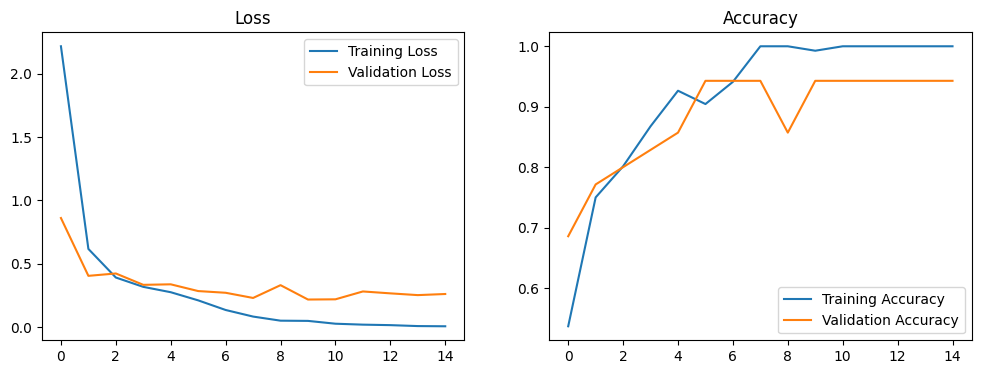

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

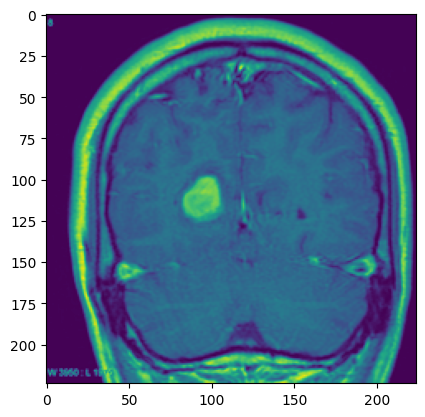

1/1 [==============================] - 0s 412ms/step
Cancerous


In [ ]:
idx=random.randint(0,len(y_test))
plt.imshow(X_test[idx])
plt.show()

y_pred=model.predict(X_test[idx].reshape(1,224,224,1))
y_pred=y_pred > 0.5

if y_pred ==0:
  print("Not Cancerous")

else:
  print("Cancerous")